<a href="https://colab.research.google.com/github/hussein227/Epilespy-EEG-Signals/blob/main/Epilepsy_classification_using_Welch_method_power_spectral_density_by_Hussein_Elsawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref paper is 
https://www.biorxiv.org/content/10.1101/324954v1

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!pip install mne -q


In [ ]:
!wget https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip


--2023-06-02 17:08:44--  https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153973086 (147M) [application/octet-stream]
Saving to: ‘EEGs_Guinea-Bissau.zip.1’

EEGs_Guinea-Bissau. 100%[===================>] 146.84M  21.7MB/s    in 19s     

2023-06-02 17:09:05 (7.78 MB/s) - ‘EEGs_Guinea-Bissau.zip.1’ saved [153973086/153973086]



In [ ]:
#unzip the files
from zipfile import ZipFile 
data = ZipFile('EEGs_Guinea-Bissau.zip')
data.extractall()

In [ ]:

meta_df=pd.read_csv('https://zenodo.org/record/1252141/files/metadata_guineabissau.csv')
meta_df.head()

,subject.id,Group,Eyes.condition,Remarks,recordedPeriod,startTime
0,1,Epilepsy,closed-3min-then-open-2min,by 45s reposition electrodes,301,27/5/2020 14:33
1,2,Control,open-3min-then-closed-2min,NaN,309,26/5/2020 22:44
2,3,Epilepsy,closed-3min-then-open-2min,NaN,309,27/5/2020 14:26
3,4,Epilepsy,closed-3min-then-open-2min,"Green lights not shown, but good EEG traces",299,27/5/2020 15:23
4,5,Control,closed-3min-then-open-2min,NaN,302,23/5/2020 19:09


In [ ]:
meta_df.describe()

,subject.id,recordedPeriod
count,97.000000,97.000000
mean,49.000000,310.113402
std,28.145456,27.835782
min,1.000000,286.000000
25%,25.000000,300.000000
50%,49.000000,303.000000
75%,73.000000,307.000000
max,97.000000,478.000000


In [ ]:
meta_df.dtypes

subject.id         int64
Group             object
Eyes.condition    object
Remarks           object
recordedPeriod     int64
startTime         object
dtype: object

In [ ]:
kk= pd.read_csv('/content/EEGs_Guinea-Bissau/signal-1.csv.gz')
kk

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,...,CQ_F3,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL
0,1,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,...,4,4,4,4,4,4,4,4,4,4
1,2,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,...,4,4,4,4,4,4,4,4,4,4
2,3,4413.846154,3986.153846,4386.666667,3831.794872,4654.871795,3881.025641,4690.769231,3908.205128,4066.666667,...,4,4,4,4,4,4,4,4,4,4
3,4,4407.692308,3984.615385,4384.102564,3832.820513,4644.615385,3883.076923,4686.153846,3910.256410,4063.076923,...,4,4,4,4,4,4,4,4,4,4
4,5,4407.179487,3978.974359,4382.564103,3832.307692,4647.692308,3878.974359,4685.641026,3903.076923,4057.948718,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38523,38524,4049.230769,3826.666667,4003.589744,3550.256410,4229.230769,3572.307692,4376.923077,3721.025641,4197.435897,...,4,4,4,4,4,4,4,4,4,4
38524,38525,4056.410256,3832.307692,4002.051282,3554.358974,4230.769231,3575.897436,4375.897436,3724.102564,4198.974359,...,4,4,4,4,4,4,4,4,4,4
38525,38526,4060.512821,3835.897436,4006.666667,3561.538462,4233.846154,3574.871795,4367.692308,3726.153846,4199.487179,...,4,4,4,4,4,4,4,4,4,4
38526,38527,4052.820513,3827.179487,4006.666667,3559.487179,4229.230769,3571.282051,4372.307692,3723.589744,4198.461538,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
meta_df.columns

Index(['subject.id', 'Group', 'Eyes.condition', 'Remarks', 'recordedPeriod',
       'startTime'],
      dtype='object')

In [ ]:
kk.columns

Index(['Unnamed: 0', 'AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1',
       'O2', 'P7', 'P8', 'T7', 'T8', 'COUNTER', 'INTERPOLATED', 'GYROX',
       'GYROY', 'RAW_CQ', 'CQ_CMS', 'CQ_F7', 'CQ_T7', 'CQ_O2', 'CQ_FC6',
       'CQ_AF4', 'CQ_F3', 'CQ_P7', 'CQ_P8', 'CQ_F4', 'CQ_AF3', 'CQ_FC5',
       'CQ_O1', 'CQ_T8', 'CQ_F8', 'CQ_DRL'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
#now i need to seprate Epilepsy vs Control subjects
EP_sub=meta_df['subject.id'][meta_df['Group']=='Epilepsy']
CT_sub=meta_df['subject.id'][meta_df['Group']=='Control']

In [ ]:
for i in EP_sub :
  print(i)

1
3
4
7
8
9
10
13
14
15
17
19
20
22
23
24
26
29
30
31
32
33
34
36
37
38
39
40
41
42
44
45
46
47
48
50
51
52
53
54
55
56
60
61
64
65
66
67
70
73
75


In [ ]:
Epilepsy=[pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip') for i in  EP_sub]
Control=[pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip') for i in  CT_sub]

In [ ]:
Epilepsy[0].head(2)

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,...,CQ_F3,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL
0,1,4426.153846,3994.871795,4408.205128,3847.692308,4690.256410,3895.897436,4702.051282,3914.871795,4049.743590,...,4,4,4,4,4,4,4,4,4,4
1,2,4420.512821,3986.666667,4394.358974,3836.923077,4678.461538,3886.666667,4696.410256,3910.769231,4054.358974,...,4,4,4,4,4,4,4,4,4,4


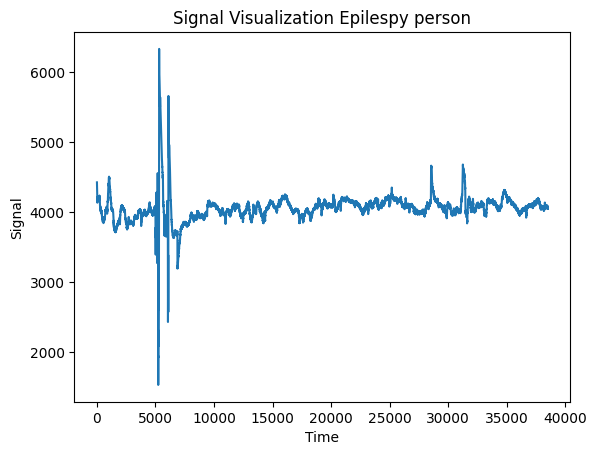

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the AF3 column
af3_signal = kk['AF3']

# Plotting the AF3 signal
plt.plot(af3_signal)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal Visualization Epilespy person')
plt.show()


In [ ]:
pp =pd.read_csv('/content/EEGs_Guinea-Bissau/signal-2.csv.gz')

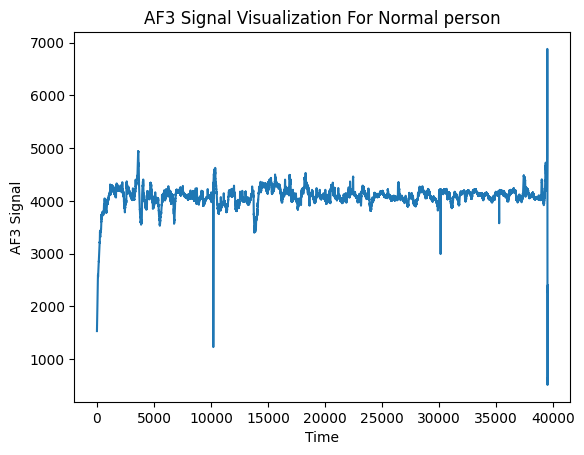

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the AF3 column
af3_signal = pp['AF3']

# Plotting the AF3 signal
plt.plot(af3_signal)
plt.xlabel('Time')
plt.ylabel('AF3 Signal')
plt.title('AF3 Signal Visualization For Normal person')
plt.show()


In [ ]:
ll=pd.read_csv("/content/EEGs_Guinea-Bissau/signal-11.csv.gz")

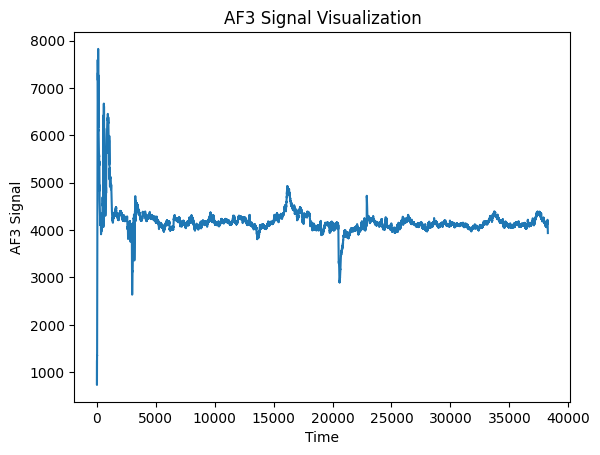

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the AF3 column
af3_signal = ll['AF3']

# Plotting the AF3 signal
plt.plot(af3_signal)
plt.xlabel('Time')
plt.ylabel('AF3 Signal')
plt.title('AF3 Signal Visualization')
plt.show()

In [ ]:
Control[0].head()

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,...,CQ_F3,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL
0,1,1528.205128,1567.692308,1100.512821,1526.666667,1723.589744,1185.641026,1573.333333,1437.435897,1312.307692,...,0,1,2,3,2,2,1,3,2,4
1,2,1543.589744,1578.461538,1115.384615,1540.000000,1737.435897,1202.051282,1590.256410,1450.256410,1328.205128,...,0,1,2,3,2,2,1,3,2,4
2,3,1564.615385,1602.564103,1135.384615,1560.512821,1757.948718,1223.076923,1616.410256,1475.384615,1351.794872,...,0,1,2,3,2,2,1,3,2,4
3,4,1580.000000,1617.948718,1155.384615,1575.384615,1776.410256,1233.333333,1633.846154,1494.358974,1371.282051,...,0,1,2,3,2,2,1,3,2,4
4,5,1588.717949,1625.128205,1167.692308,1586.153846,1790.769231,1238.974359,1644.102564,1495.384615,1381.025641,...,0,1,2,3,2,2,1,3,2,4


In [ ]:
#remove non eeg channels
Epilepsy=[i.iloc[:,1:15] for i in  Epilepsy]
Control=[i.iloc[:,1:15] for i in  Control]
     

In [ ]:
Control[0].head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,1528.205128,1567.692308,1100.512821,1526.666667,1723.589744,1185.641026,1573.333333,1437.435897,1312.307692,1786.666667,1470.256410,1518.461538,898.461538,1815.384615
1,1543.589744,1578.461538,1115.384615,1540.000000,1737.435897,1202.051282,1590.256410,1450.256410,1328.205128,1804.615385,1478.974359,1531.282051,916.923077,1834.871795
2,1564.615385,1602.564103,1135.384615,1560.512821,1757.948718,1223.076923,1616.410256,1475.384615,1351.794872,1825.641026,1491.794872,1556.410256,936.410256,1857.435897
3,1580.000000,1617.948718,1155.384615,1575.384615,1776.410256,1233.333333,1633.846154,1494.358974,1371.282051,1843.076923,1508.205128,1573.333333,956.410256,1868.205128
4,1588.717949,1625.128205,1167.692308,1586.153846,1790.769231,1238.974359,1644.102564,1495.384615,1381.025641,1851.794872,1521.538462,1578.974359,970.769231,1874.871795


 apply MNE-Python's standard preprocessing pipeline, which includes filtering, epoching, and artifact removal

Event segmentation: Epochs divide the continuous EEG data into shorter, discrete segments that correspond to specific events or time points of interest. These events can event-related markers that are relevant to the experimental paradigm or analysis.

In [ ]:
import mne
def convertDF2MNE(sub):
    info = mne.create_info(list(sub.columns), ch_types=['eeg'] * len(sub.columns), sfreq=128)
    info.set_montage('standard_1020') # standard
    data=mne.io.RawArray(sub.T, info)
    data.set_eeg_reference()
    data.filter(l_freq=0.1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1) # windowing 
    epochs=epochs.drop_bad()
    
    return epochs

In [ ]:
#Convert each dataframe to mne object
Epilepsy=[convertDF2MNE(i) for i in  Epilepsy]
Control=[convertDF2MNE(i) for i in  Control]
     

Creating RawArray with float64 data, n_channels=14, n_times=38528
    Range : 0 ... 38527 =      0.000 ...   300.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 77 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38656
    Range : 0 ... 38655 =      0.000 ...   301.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 82 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=42368
    Range : 0 ... 42367 =      0.000 ...   330.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 82 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39808
    Range : 0 ... 39807 =      0.000 ...   310.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 77 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=40832
    Range : 0 ... 40831 =      0.000 ...   318.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 79 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=40832
    Range : 0 ... 40831 =      0.000 ...   318.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39040
    Range : 0 ... 39039 =      0.000 ...   304.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39296
    Range : 0 ... 39295 =      0.000 ...   306.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=37120
    Range : 0 ... 37119 =      0.000 ...   289.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 79 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38656
    Range : 0 ... 38655 =      0.000 ...   301.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39040
    Range : 0 ... 39039 =      0.000 ...   304.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=61184
    Range : 0 ... 61183 =      0.000 ...   477.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 640 original time 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=40448
    Range : 0 ... 40447 =      0.000 ...   315.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
78 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 78 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=14, n_times=41344
    Range : 0 ... 41343 =      0.000 ...   322.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 80 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=48896
    Range : 0 ... 48895 =      0.000 ...   381.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Using data from preloaded Raw for 95 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39040
    Range : 0 ... 39039 =      0.000 ...   304.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
76 matching events found
No baseline correction applied
0 projection items a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 77 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38528
    Range : 0 ... 38527 =      0.000 ...   300.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=40064
    Range : 0 ... 40063 =      0.000 ...   312.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38528
    Range : 0 ... 38527 =      0.000 ...   300.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=54016
    Range : 0 ... 54015 =      0.000 ...   421.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 105 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39168
    Range : 0 ... 39167 =      0.000 ...   305.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=42240
    Range : 0 ... 42239 =      0.000 ...   329.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 82 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 97 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=40832
    Range : 0 ... 40831 =      0.000 ...   318.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39552
    Range : 0 ... 39551 =      0.000 ...   308.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 77 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38400
    Range : 0 ... 38399 =      0.000 ...   299.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=54400
    Range : 0 ... 54399 =      0.000 ...   424.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 106 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=37888
    Range : 0 ... 37887 =      0.000 ...   295.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
73 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 73 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38144
    Range : 0 ... 38143 =      0.000 ...   297.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38144
    Range : 0 ... 38143 =      0.000 ...   297.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38400
    Range : 0 ... 38399 =      0.000 ...   299.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=14, n_times=36608
    Range : 0 ... 36607 =      0.000 ...   285.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 71 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
78 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 78 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38656
    Range : 0 ... 38655 =      0.000 ...   301.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38272
    Range : 0 ... 38271 =      0.000 ...   298.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38528
    Range : 0 ... 38527 =      0.000 ...   300.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39040
    Range : 0 ... 39039 =      0.000 ...   304.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=36992
    Range : 0 ... 36991 =      0.000 ...   288.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Creating RawArray with float64 data, n_channels=14, n_times=37888
    Range : 0 ... 37887 =      0.000 ...   295.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
73 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 73 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38784
    Range : 0 ... 38783 =      0.000 ...   302.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching even

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=39040
    Range : 0 ... 39039 =      0.000 ...   304.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=37760
    Range : 0 ... 37759 =      0.000 ...   294.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38912
    Range : 0 ... 38911 =      0.000 ...   303.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38400
    Range : 0 ... 38399 =      0.000 ...   299.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time po

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 76 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38400
    Range : 0 ... 38399 =      0.000 ...   299.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Creating RawArray with float64 data, n_channels=14, n_times=38528
    Range : 0 ... 38527 =      0.000 ...   300.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33.008 s)

Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 75 events and 640 original time points ...
0 bad epochs

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
73 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 73 events and 640 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=14, n_times=38400
    Range : 0 ... 38399 =      0.000 ...   299.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 4225 samples (33

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 74 events and 640 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished


(FIR) filter using a windowed time-domain design method. It generates the filter coefficients based on the specified parameters, including the passband ripple, stopband attenuation, passband and stopband edge frequencies, transition bandwidths, and filter length. The resulting filter coefficients can be used to apply the bandpass filtering operation to your signal.

In [ ]:
Epilepsy_epochs=mne.concatenate_epochs(Epilepsy)
Control_epochs=mne.concatenate_epochs(Control)

Using data from preloaded Raw for 75 events and 640 original time points ...
Using data from preloaded Raw for 77 events and 640 original time points ...
Using data from preloaded Raw for 74 events and 640 original time points ...
Using data from preloaded Raw for 75 events and 640 original time points ...
Using data from preloaded Raw for 82 events and 640 original time points ...
Using data from preloaded Raw for 82 events and 640 original time points ...
Using data from preloaded Raw for 77 events and 640 original time points ...
Using data from preloaded Raw for 79 events and 640 original time points ...
Using data from preloaded Raw for 79 events and 640 original time points ...
Using data from preloaded Raw for 74 events and 640 original time points ...
Using data from preloaded Raw for 76 events and 640 original time points ...
Using data from preloaded Raw for 76 events and 640 original time points ...
Using data from preloaded Raw for 75 events and 640 original time points ...

In [ ]:

Epilepsy_group=np.concatenate([[i]*len(Epilepsy[i]) for i in range(len(Epilepsy))])#create a list of list where each sub list corresponds to subject_no
Control_group=np.concatenate([[i]*len(Control[i]) for i in range(len(Control))])#create a list of list where each sub list corresponds to subject_no

Epilepsy_label=np.concatenate([[0]*len(Epilepsy[i]) for i in range(len(Epilepsy))])
Control_label=np.concatenate([[1]*len(Control[i]) for i in range(len(Control))])

In [ ]:
Epilepsy_group.shape,Control_group.shape,Epilepsy_label.shape,Control_label.shape


((3995,), (3461,), (3995,), (3461,))

In [ ]:
#combine data
data=mne.concatenate_epochs([Epilepsy_epochs,Control_epochs])
group=np.concatenate((Epilepsy_group,Control_group))
label=np.concatenate((Epilepsy_label,Control_label))
print(len(data),len(group),len(label))

Not setting metadata
7456 matching events found
No baseline correction applied
7456 7456 7456


In [ ]:
import numpy as np


In [ ]:
import mne
print(mne.__version__)


1.4.0


In [ ]:
import mne.time_frequency
print(mne.__version__)

1.4.0


In [ ]:
!pip install --upgrade mne






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import signal



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The parameter picks with the value 'eeg' is used to select only the EEG channels from a data structure. It allows you to specify which channels to include or exclude when performing operations or computations.

In [ ]:
#mne.time_frequency.psd_welch(inst, fmin=0, fmax=inf, tmin=None, tmax=None, n_fft=256, n_overlap=0, n_per_seg=None, picks=None, proj=False, n_jobs=1, reject_by_annotation=True, average='mean', window='hamming', verbose=None)

In [ ]:
pip install --upgrade mne


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from mne.time_frequency import psd_array_multitaper
import matplotlib.pyplot as plt

In [ ]:
pip install pyentrp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nolds


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

def apply_statistical_features(data):
    # Apply statistical feature extraction
    X_features = []
    for epoch in data:
        features = []
        # Calculate statistical features for each channel
        for channel in epoch:
            channel_features = []
            channel_features.append(np.mean(channel))  # Mean
            channel_features.append(np.var(channel))  # Variance
            channel_features.append(np.max(channel))  # Maximum
            channel_features.append(np.min(channel))  # Minimum
            channel_features.append(np.median(channel))  # Median
            channel_features.append(np.std(channel))  # Standard Deviation
            # Add more statistical features as needed
            features.extend(channel_features)
        X_features.append(features)

    X_features = np.array(X_features)

    return X_features

# Assuming you have the 'data' variable available
X_features = apply_statistical_features(data)
print(X_features)


[[-7.53495466e+01  1.87230047e+03  2.51829794e+01 ... -7.67051998e+01
  -5.71674207e-01  2.80296991e+01]
 [-1.17882803e+01  1.27674649e+04  2.08673015e+02 ... -6.08553950e+01
   1.18534498e+01  1.88999205e+01]
 [ 8.23261003e+01  2.45384871e+03  2.08673015e+02 ... -8.09398590e+01
  -3.68952383e+01  2.30824144e+01]
 ...
 [ 2.00886813e+01  2.43370225e+02  6.66755779e+01 ... -2.55168826e+01
  -2.24691351e+00  7.63649160e+00]
 [ 2.40765761e+01  1.40232584e+03  8.26991982e+01 ... -3.90018210e+01
   9.95400345e-01  1.62993911e+01]
 [-5.59057782e+01  7.48443287e+02  1.21445182e+01 ... -1.34791896e+01
   1.17537966e+01  1.20279072e+01]]


In [ ]:
#import pywt
#import numpy as np
#import matplotlib.pyplot as plt

# Assume 'data' is your input 3D array
#data = np.random.rand(7456, 14, 46)

#wavelet = 'db4'  # Wavelet type
#level = 4  # Number of decomposition levels

# Select a specific slice for visualization
#y_slice = data[:, 0, 0]  # Select the first element along the second and third dimensions

# Perform wavelet decomposition
#coeffs = pywt.wavedec(y_slice, wavelet, level=level)

# Extract approximation coefficients (cA) and detail coefficients (cD) for each level
#cA_coeffs = [coeffs[0]]  # Initial approximation coefficients
#cD_coeffs = coeffs[1:]  # Detail coefficients for each level

# Plot the approximation and detail coefficients for each level
#for i in range(level):
    # Plot approximation coefficients
 #   plt.subplot(level+1, 2, i+1)
   # plt.plot(cA_coeffs[i])
  #  plt.title(f'Approximation Coefficients (Level {i+1})')

    # Plot detail coefficients
    #plt.subplot(level+1, 2, 2*i+2)
    #plt.plot(cD_coeffs[i])
    #plt.title(f'Detail Coefficients (Level {i+1})')

# Plot the original data slice
#plt.subplot(level+1, 2, level*2+1)
#plt.plot(y_slice)
#plt.title('Original Data')

# Adjust the layout
#plt.tight_layout()

# Display the plot
#plt.show()


In [ ]:
import numpy as np
from mne.time_frequency import psd_array_multitaper
#This is PSD Feature Extraction 
def eeg_power_band(epoch):
    # specific frequency bands
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "sigma": [11.5, 15.5],
                  "beta": [15.5, 30],
                  "gamma": [30, 45],
                  }

    psds, freqs = psd_array_multitaper(epoch, sfreq=128, fmin=0.5, fmax=45, verbose=0)
    psds /= np.sum(psds, axis=-1, keepdims=True)    # Normalize the PSDs

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, (freqs >= fmin) & (freqs < fmax)].mean(axis=1)
        X.append(psds_band)

    X_concatenated = np.concatenate(X, axis=0)
    print(X_concatenated)

    return X_concatenated

features = []
for epoch in data:
    features.append(eeg_power_band(epoch))


Streaming output truncated to the last 5000 lines.
 9.20352242e-04 6.37093796e-04 4.21615244e-04 6.19618592e-04
 7.42726442e-04 2.35441337e-04 8.43668753e-04 3.40530868e-04
 9.39858230e-05 1.09100621e-04 3.37800620e-04 3.07060803e-04
 2.26823654e-04 4.44166253e-05 3.42810378e-04 3.51938370e-04
 2.79887516e-04 3.28375066e-04 4.01490665e-04 1.22421304e-04
 3.55163868e-04 1.98522065e-04 4.30151179e-05 2.93490841e-05
 1.02234054e-04 5.84317832e-05 1.07412226e-04 1.66812604e-05
 1.88498171e-04 9.58820656e-05 5.44510120e-05 6.21022530e-05
 7.88667388e-05 3.09098793e-05 1.38295022e-04 1.10614615e-04]
[2.89642649e-02 3.60562954e-02 2.03664637e-02 1.88200103e-02
 2.93344864e-02 4.01937481e-02 3.08114055e-02 1.27966620e-02
 2.75797028e-02 2.54922846e-02 4.60173433e-02 2.21360398e-02
 3.21259447e-02 2.64826424e-02 5.97419669e-03 3.94298473e-03
 1.05017799e-02 9.21663945e-03 5.97533866e-03 3.05305637e-03
 5.56244550e-03 8.93310225e-03 3.61382100e-03 4.60344123e-03
 8.86136084e-04 7.33096504e-03 4.

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
print(features2)

[]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
pip install --upgrade scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mne.version

<function importlib.metadata.version(distribution_name)>

In [ ]:

pip show mne


Name: mne
Version: 1.4.0
Summary: MNE-Python project for MEG and EEG data analysis.
Home-page: https://mne.tools/dev/
Author: 
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: decorator, jinja2, matplotlib, numpy, packaging, pooch, scipy, tqdm
Required-by: 


Once the relevant features are extracted from the EEG signals, they can be used as the feature vector input to machine learning algorithms, such as the RandomForestClassifier . The classifier can then learn patterns from the feature vectors and classify new instances as either epileptic or non-epileptic based on the learned patterns.

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Instantiate the XGBClassifier
klf = xgb.XGBClassifier()
# for Statiscal features 
X_train, X_test, y_train, y_test = train_test_split(X_features, label, test_size=0.3, random_state=21)
# Fit the model
klf.fit(X_train, y_train)
# Make the predictions
y_predict = klf.predict(X_test)
# Measure the performance
print(metrics.accuracy_score(y_test, y_predict))

0.7948144836835047


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Instantiate the XGBClassifier
klf = xgb.XGBClassifier()
# for PSD features 
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=21)
# Fit the model
klf.fit(X_train, y_train)
# Make the predictions
y_predict = klf.predict(X_test)
# Measure the performance
print(metrics.accuracy_score(y_test, y_predict))

0.8824318283415288


Test Accuracy: 0.8824318283415288
Train Accuracy: 1.0


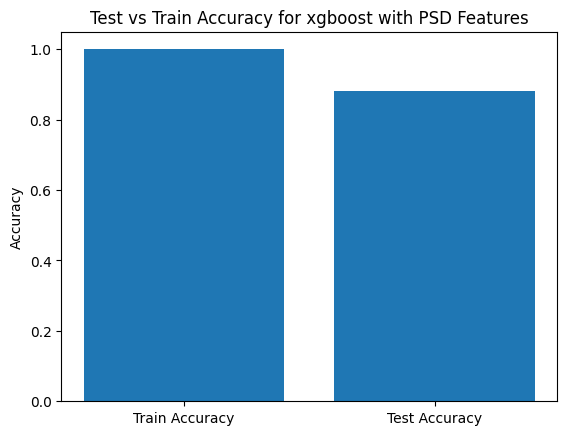

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
#PSD Feature Extraction
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=21)

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Calculate accuracy scores
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)

# Print the accuracy scores
print('Test Accuracy:', test_accuracy)
print('Train Accuracy:', train_accuracy)

# Plot the test vs train accuracy
accuracy_scores = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Test vs Train Accuracy for xgboost with PSD Features')
plt.show()

Test Accuracy: 0.7948144836835047
Train Accuracy: 1.0


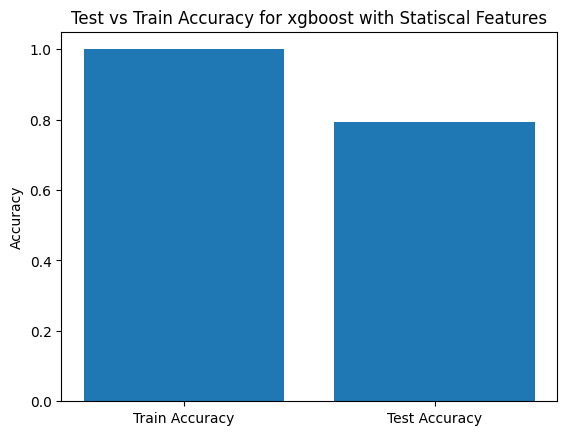

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
#with Statiscal Features
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, label, test_size=0.3, random_state=21)

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Calculate accuracy scores
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)

# Print the accuracy scores
print('Test Accuracy:', test_accuracy)
print('Train Accuracy:', train_accuracy)

# Plot the test vs train accuracy
accuracy_scores = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Test vs Train Accuracy for xgboost with Statiscal Features')
plt.show()


In [ ]:
import numpy as np
import pywt

def apply_wavelet_transform(epochs):
    # Define wavelet parameters
    wavelet = 'db4'  # Wavelet type
    level = 5  # Number of decomposition levels

    # Apply wavelet transform
    X_wavelet = []
    for epoch in epochs:
        cA, cD = pywt.dwt(epoch, wavelet)
        for _ in range(level-1):
            cA, cD = pywt.dwt(cA, wavelet)
        X_wavelet.append(cA)

    X_wavelet = np.array(X_wavelet)

    return X_wavelet

wavelet_features = []
for epoch in data:
    wavelet_features.append(apply_wavelet_transform(epoch))


In [ ]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

def apply_wavelet_transform(epochs):
    # Define wavelet parameters
    wavelet = 'db4'  # Wavelet type
    level = 5  # Number of decomposition levels

    # Apply wavelet transform
    X_wavelet = []
    for epoch in epochs:
        cA, cD = pywt.dwt(epoch, wavelet)
        for _ in range(level-1):
            cA, cD = pywt.dwt(cA, wavelet)
        X_wavelet.append(cA)

    X_wavelet = np.array(X_wavelet)

    return X_wavelet

wavelet_features = []
for epoch in data:
    wavelet_features.append(apply_wavelet_transform(epoch))

# Convert to numpy array
wavelet_features = np.array(wavelet_features)

# Reshape the features to 2D
wavelet_features = np.reshape(wavelet_features, (wavelet_features.shape[0], -1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(wavelet_features, label, test_size=0.3, random_state=21)

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Measure the performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7340187751452839


Train Accuracy: 1.0
Test Accuracy: 0.7340187751452839


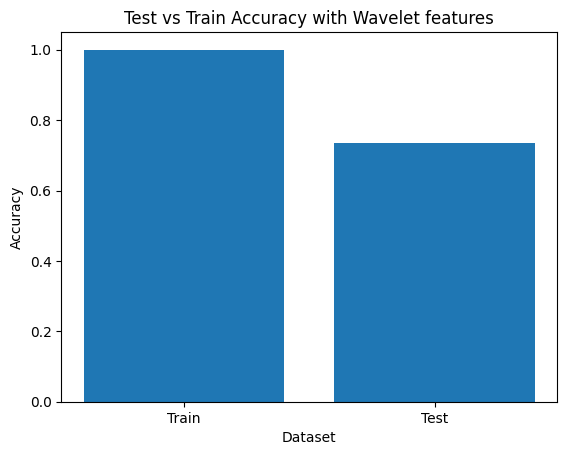

In [ ]:
import matplotlib.pyplot as plt

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Measure the accuracies
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot the test vs train accuracy
plt.bar(["Train", "Test"], [train_accuracy, test_accuracy])
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Test vs Train Accuracy with Wavelet features")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier()

# Perform cross-validation
#accuracies = cross_val_score(clf, features, label, groups=group, cv=5, error_score='raise')

# Print the results
#print('Five-fold accuracies:', accuracies)
#print('Average accuracy:', np.mean(accuracies))
X_train, X_test, y_train, y_test = train_test_split(wavelet_features, label, test_size=0.3, random_state=21)
# Fit the model
clf.fit(X_train, y_train)
# Make the predictions
y_predict = clf.predict(X_test)
# Measure the performance
print(metrics.accuracy_score(y_test, y_predict))

0.7340187751452839


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Instantiate the GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Perform cross-validation
accuracies = cross_val_score(clf, features, label, groups=group, cv=5, error_score='raise')

# Print the results
print('Five-fold accuracies:', accuracies)
print('Average accuracy:', np.mean(accuracies))


Five-fold accuracies: [0.72184987 0.65057009 0.62709591 0.75519785 0.73239437]
Average accuracy: 0.6974216163828368


AUC stands for Area Under the Curve, and it is a metric used to evaluate the performance of a classification model. It is commonly used in machine learning and statistics to measure the quality of a binary classifier.

The AUC value ranges from 0 to 1, where a higher value indicates better performance. An AUC of 0.5 suggests that the classifier is performing no better than random chance, while an AUC of 1 indicates a perfect classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier()

# Perform cross-validation and get predicted probabilities
y_pred_prob = cross_val_predict(clf, X_features, label, groups=group, cv=5, method='predict_proba')[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(label, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the results
print('False Positive Rate (FPR):', fpr)
print('True Positive Rate (TPR):', tpr)
print('Thresholds:', thresholds)
print('AUC:', roc_auc)


False Positive Rate (FPR): [0.00000000e+00 5.00625782e-04 5.00625782e-04 1.00125156e-03
 1.25156446e-03 1.75219024e-03 2.00250313e-03 2.25281602e-03
 2.50312891e-03 3.50438048e-03 5.75719650e-03 6.00750939e-03
 7.75969962e-03 8.01001252e-03 1.05131414e-02 1.17647059e-02
 1.25156446e-02 1.50187735e-02 1.67709637e-02 1.97747184e-02
 2.32790989e-02 2.72841051e-02 3.25406758e-02 3.67959950e-02
 4.13016270e-02 4.48060075e-02 4.90613267e-02 5.38172716e-02
 5.83229036e-02 6.48310388e-02 7.30913642e-02 8.18523154e-02
 9.18648310e-02 1.03128911e-01 1.13892365e-01 1.22903630e-01
 1.34418023e-01 1.46933667e-01 1.60200250e-01 1.72966208e-01
 1.86232791e-01 1.98998748e-01 2.14267835e-01 2.33041302e-01
 2.49061327e-01 2.70838548e-01 2.86107635e-01 3.01126408e-01
 3.19148936e-01 3.38423029e-01 3.59198999e-01 3.79974969e-01
 3.98748436e-01 4.20525657e-01 4.41301627e-01 4.64831039e-01
 4.84605757e-01 5.11889862e-01 5.35669587e-01 5.63204005e-01
 5.88235294e-01 6.11264080e-01 6.30788486e-01 6.54317897e-

False Positive Rate (FPR): [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.00625782e-04 1.00125156e-03 1.50187735e-03 1.75219024e-03
 2.50312891e-03 3.50438048e-03 4.50563204e-03 5.00625782e-03
 5.25657071e-03 7.25907384e-03 9.26157697e-03 1.10137672e-02
 1.30162703e-02 1.52690864e-02 1.70212766e-02 1.90237797e-02
 2.12765957e-02 2.40300375e-02 2.65331665e-02 3.10387985e-02
 3.35419274e-02 3.87984981e-02 4.48060075e-02 5.08135169e-02
 5.60700876e-02 6.35794743e-02 7.33416771e-02 8.26032541e-02
 8.86107635e-02 9.66207760e-02 1.05632040e-01 1.15394243e-01
 1.28660826e-01 1.39674593e-01 1.49937422e-01 1.62953692e-01
 1.73466834e-01 1.84730914e-01 1.98748436e-01 2.16020025e-01
 2.29787234e-01 2.47058824e-01 2.63329161e-01 2.80100125e-01
 2.98873592e-01 3.15644556e-01 3.30413016e-01 3.53942428e-01
 3.71714643e-01 3.97246558e-01 4.16770964e-01 4.39799750e-01
 4.62327910e-01 4.84105131e-01 5.06633292e-01 5.26908636e-01
 5.52941176e-01 5.77972466e-01 6.01501877e-01 6.23279099e-

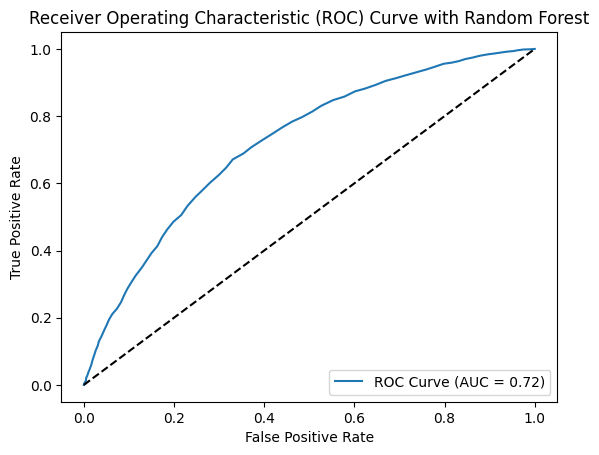

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier()

# Perform cross-validation and get predicted probabilities
y_pred_prob = cross_val_predict(clf, X_features, label, groups=group, cv=5, method='predict_proba')[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(label, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the results
print('False Positive Rate (FPR):', fpr)
print('True Positive Rate (TPR):', tpr)
print('Thresholds:', thresholds)
print('AUC:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Random Forest')
plt.legend(loc='lower right')
plt.show()


False Positive Rate (FPR): [0.         0.         0.         ... 0.99349186 0.99349186 1.        ]
True Positive Rate (TPR): [0.00000000e+00 2.88933834e-04 8.66801502e-04 ... 9.99711066e-01
 1.00000000e+00 1.00000000e+00]
Thresholds: [1.9993829e+00 9.9938285e-01 9.9934262e-01 ... 5.1077397e-04 5.0633948e-04
 8.0701546e-05]
AUC: 0.7274821640312453


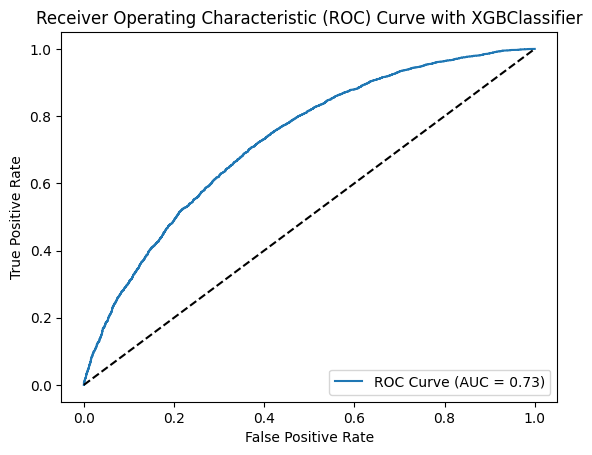

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Instantiate the RandomForestClassifier
clf = xgb.XGBClassifier()

# Perform cross-validation and get predicted probabilities
y_pred_prob = cross_val_predict(clf, X_features, label, groups=group, cv=5, method='predict_proba')[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(label, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the results
print('False Positive Rate (FPR):', fpr)
print('True Positive Rate (TPR):', tpr)
print('Thresholds:', thresholds)
print('AUC:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with XGBClassifier')
plt.legend(loc='lower right')
plt.show()

False Positive Rate (FPR): [0.00000000e+00 2.50312891e-04 1.25156446e-03 ... 9.99749687e-01
 1.00000000e+00 1.00000000e+00]
True Positive Rate (TPR): [0.         0.         0.         ... 0.99884426 0.99884426 1.        ]
Thresholds: [1.96861853 0.96861853 0.95028073 ... 0.22693543 0.2239354  0.19971411]
AUC: 0.5055147307436809


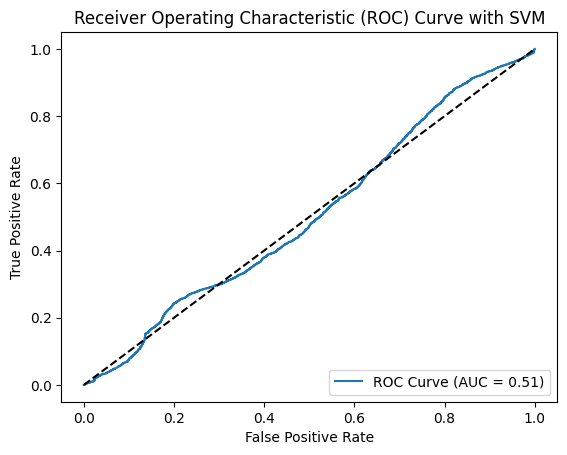

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Instantiate the SVC classifier
clf = SVC(probability=True)

# Perform cross-validation and get predicted probabilities
y_pred_prob = cross_val_predict(clf, X_features, label, groups=group, cv=5, method='predict_proba')[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(label, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the results
print('False Positive Rate (FPR):', fpr)
print('True Positive Rate (TPR):', tpr)
print('Thresholds:', thresholds)
print('AUC:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with SVM')
plt.legend(loc='lower right')
plt.show()
